In [138]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [155]:
# official final rankings in D3 National Championships
final_rankings = [
    "MIT", "U. of Chicago", "Williams", "NYU", "Johns Hopkins", "Colorado College", "Emory", "Washington and Lee", "SUNY Geneseo", "Washington U.", "Claremont-Mudd-Scripps", "RPI", "Wis.-La Crosse", "Amherst", "Calvin", "Tufts", "St. Olaf", "Carleton", "UC Santa Cruz", "Vassar", "George Fox", "Middlebury", "Connecticut College", "Wesleyan", "Carnegie Mellon", "Wartburg", "Lynchburg", "Trine", "DePauw", "Pomona-Pitzer", "Coast Guard", "Rowan"
]
# given two lists of rankings, find the mean squared error of their positions 
def compare_lists(list1, list2):
    schools = set(list1 + list2)
    # return number of schools in both lists
    return abs(stats.spearmanr(list1, list2)[0])
    # return len(set(list1).intersection(set(list2)))/len(schools)



    # for school in schools:
    #     if school in list1 and school in list2:
    #         se.append((list1.index(school) - list2.index(school)) ** 2)
    # return np.sqrt(sum(se)) / len(schools)


In [140]:
adj = pd.read_csv("./running_all_d3.csv", header=0)
labels = adj.columns.tolist()
A = adj.values

In [141]:
L = pd.read_csv("./running_all_d3_diff.csv", header=0)
L = L.to_numpy()

In [142]:
G = nx.DiGraph()
for i, u in enumerate(labels):
    for j, v in enumerate(labels):
        w = A[i, j]
        if w != 0:
            G.add_edge(u, v, weight=w)

In [143]:
def springRank(G, nodelist, alpha=0.1, change_adj = False,change_minus_one=False):

    if change_adj:
        adj = pd.read_csv("./running_all_d3_diff.csv", header=0)
        A = adj.values
    else: #just use what we already have 
        A = nx.to_numpy_array(G, nodelist=nodelist, weight='weight')

    k_in = np.sum(A, axis=0)
    # k_in = np.zeros(len(A))

    # for i in range(A.shape[0]):
    #     total = 0
    #     for j in range(len(A[i])): 
    #         total += A[j][i] 
    #     k_in[i] = total
        



    k_out = np.sum(A, axis=1)
    # k_out = np.zeros(len(A))
    # for i in range(A.shape[0]):
    #     total = 0
    #     for j in range(len(A[i])): 
    #         total += A[i][j]
    #     k_out[i] = total


    new_sub = np.zeros(len(A))
    for i in range(len(A)):
        for j in range(len(A[i])):
            if change_minus_one:
                new_sub[i] += L[j][i]*(A[j][i] - A[i][j])
            else:
                new_sub[i] += (A[j][i] - A[i][j])

            # new_sub[i] += (A[j][i] - A[i][j])
    

    Kin = np.diag(k_in)
    Kout = np.diag(k_out)


    sub = k_in - k_out

    M = Kout + Kin - (A + A.T) + alpha * np.identity(len(nodelist))
    b = (new_sub)

    s = np.linalg.solve(M, b)

    return dict(zip(nodelist, s))

In [144]:
alpha = 0.1
raw_scores = springRank(G, labels, alpha)
scores = np.array([ raw_scores[node] for node in labels ])
scores_norm = (scores - scores.min()) / (scores.max() - scores.min() + 1e-9)


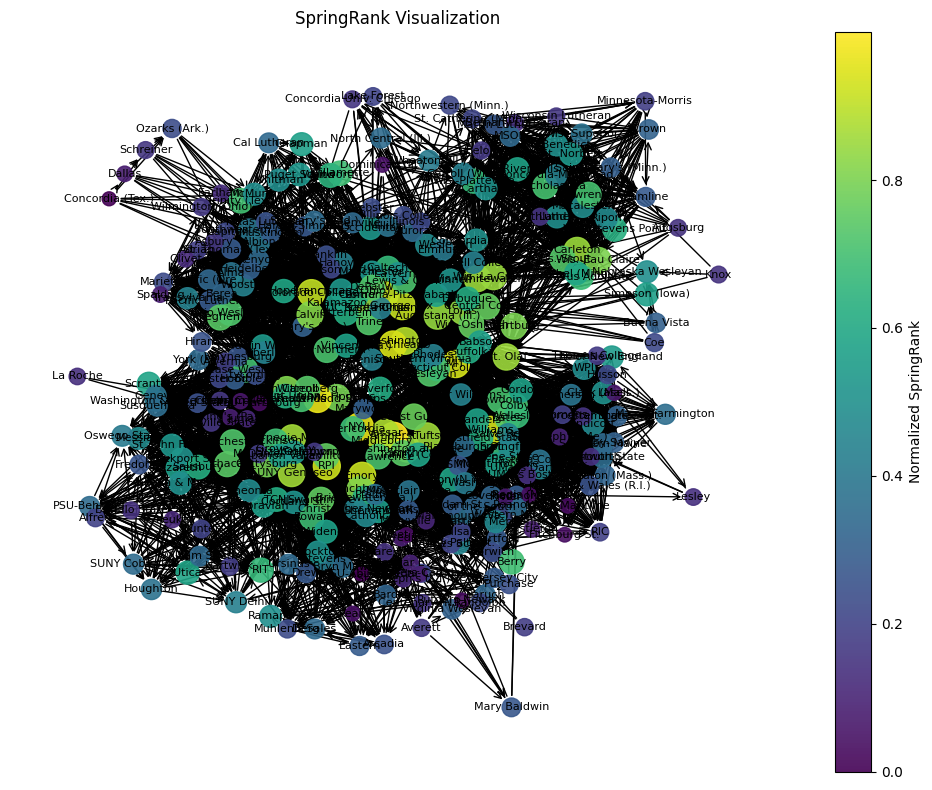

In [145]:
plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(G, scale=2)
nodes = nx.draw_networkx_nodes(
    G, 
    pos,
    nodelist=labels,
    node_color=scores_norm,
    cmap=plt.cm.viridis,
    node_size=100 + 300 * scores_norm,
    alpha=0.9
)
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=12, width=1)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.colorbar(nodes, label="Normalized SpringRank")
plt.title("SpringRank Visualization", fontsize=12)
plt.axis('off')
plt.tight_layout()
plt.show()

In [146]:
pr = dict(zip(labels, scores_norm))

sorted_list = sorted(pr.items(), key=lambda x: x[1], reverse=True)
#   # get the ordered list

print("Ranked Schools:")

for i, (school, score) in enumerate(sorted_list, start=1):
    print(f"{i}. {school} - {score:.4f}")


Ranked Schools:
1. Amherst - 1.0000
2. Claremont-Mudd-Scripps - 0.9674
3. NYU - 0.9609
4. U. of Chicago - 0.9403
5. Williams - 0.9348
6. MIT - 0.9336
7. RPI - 0.9243
8. Emory - 0.9178
9. George Fox - 0.9140
10. Colorado College - 0.9088
11. Pomona-Pitzer - 0.9082
12. Middlebury - 0.8955
13. Washington U. - 0.8906
14. Vassar - 0.8764
15. SUNY Geneseo - 0.8610
16. Carnegie Mellon - 0.8595
17. Tufts - 0.8564
18. St. Olaf - 0.8519
19. Carleton - 0.8510
20. Wis.-Whitewater - 0.8492
21. Wis.-La Crosse - 0.8470
22. Washington and Lee - 0.8418
23. Augustana (Ill.) - 0.8402
24. UC Santa Cruz - 0.8398
25. Loras - 0.8379
26. Calvin - 0.8184
27. Lynchburg - 0.8131
28. John Carroll - 0.8055
29. Wis.-Eau Claire - 0.8025
30. Wartburg - 0.7986
31. Johns Hopkins - 0.7932
32. Gettysburg - 0.7912
33. Coast Guard - 0.7732
34. Wis.-Oshkosh - 0.7640
35. Central College - 0.7635
36. Grove City - 0.7621
37. Swarthmore - 0.7577
38. Hamilton - 0.7576
39. Allegheny - 0.7419
40. Smith - 0.7418
41. Ithaca - 0.7404

In [147]:
ordered = []

for i in range(len(final_rankings)):
    ordered.append(sorted_list[i][0])
compare_lists(final_rankings, ordered)
    

0.6842105263157895

In [148]:
def top_k_mse(k, rankings, final_rankings):
    """
    Calculate the mean squared error for the top k rankings.
    """
    mse = compare_lists(rankings[:k], final_rankings[:k])
    return mse

In [149]:
def ordered(scores):
    pr = dict(zip(labels, scores))
    sorted_list = sorted(pr.items(), key=lambda x: x[1], reverse=True)
    ordered = []
    for i in range(len(final_rankings)):
        ordered.append(sorted_list[i][0])
    return ordered
def do_springrank_change_diff(G):
    raw_scores = springRank(G, labels, alpha, change_minus_one=True) 
    scores = np.array([ raw_scores[node] for node in labels ])
    return ordered(scores)
def do_springrank_adj_change(G):
    raw_scores = springRank(G, labels, alpha, change_adj=True) 
    scores = np.array([ raw_scores[node] for node in labels ])
    return ordered(scores)
def do_springrank_both_changes(G):
    raw_scores = springRank(G, labels, alpha, change_adj=True, change_minus_one=True)
    scores = np.array([ raw_scores[node] for node in labels ])
    return ordered(scores)
def do_springrank(G):
    raw_scores = springRank(G, labels, alpha)
    scores = np.array([ raw_scores[node] for node in labels ])
    return ordered(scores)
def do_pagerank(G):
    raw_scores = nx.pagerank(G, alpha=alpha)
    scores = np.array([ raw_scores[node] for node in labels ])
    return ordered(scores)
def do_eigenrank(G):
    raw_scores = nx.eigenvector_centrality(G, max_iter=1000)
    scores = np.array([ raw_scores[node] for node in labels ])
    return ordered(scores)
    

['Amherst', 'Claremont-Mudd-Scripps', 'NYU', 'U. of Chicago', 'Williams', 'MIT', 'RPI', 'Emory', 'George Fox', 'Colorado College', 'Pomona-Pitzer', 'Middlebury', 'Washington U.', 'Vassar', 'SUNY Geneseo', 'Carnegie Mellon', 'Tufts', 'St. Olaf', 'Carleton', 'Wis.-Whitewater', 'Wis.-La Crosse', 'Washington and Lee', 'Augustana (Ill.)', 'UC Santa Cruz', 'Loras', 'Calvin', 'Lynchburg', 'John Carroll', 'Wis.-Eau Claire', 'Wartburg', 'Johns Hopkins', 'Gettysburg']


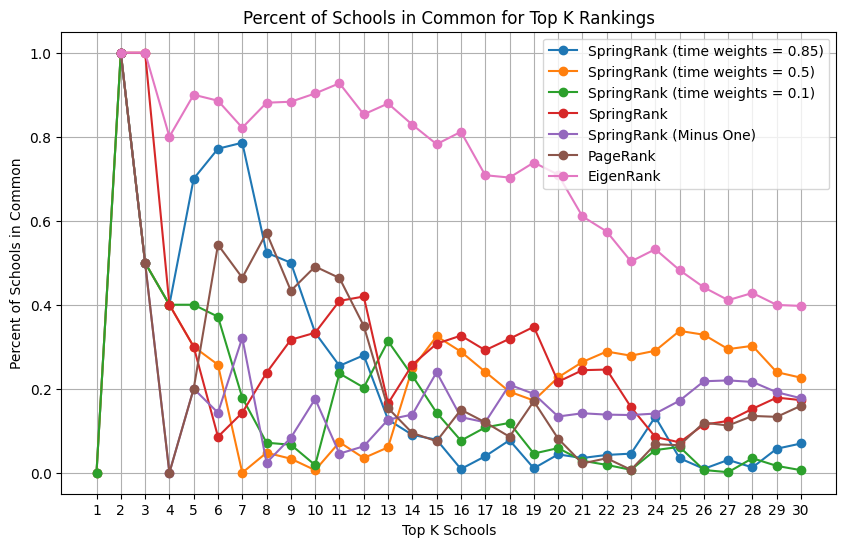

In [ ]:
springrank_mses = []
springrank_mses_minus_one = []
springrank_mses_change_adj = []
springrank_mses_both_changes = []
pagerank_mses = []
eigenrank_mses = []

spring_rankings = do_springrank(G)
spring_rankings_minus_one = do_springrank_change_diff(G)
# spring_rankings_change_adj = do_springrank_adj_change(G)
# spring_rankings_both_changes = do_springrank_both_changes(G)

pagerank_rankings = do_pagerank(G)
eigenrank_rankings = do_eigenrank(G)

print(spring_rankings)
for k in range(1, 31):
    springrank_mse = top_k_mse(k, spring_rankings, final_rankings)
    springrank_mses.append(springrank_mse)

    springrank_mse_minus_one = top_k_mse(k, spring_rankings_minus_one, final_rankings)
    springrank_mses_minus_one.append(springrank_mse_minus_one)

    # springrank_mse_change_adj = top_k_mse(k, spring_rankings_change_adj, final_rankings)
    # springrank_mses_change_adj.append(springrank_mse_change_adj)

    # springrank_mse_both_changes = top_k_mse(k, spring_rankings_both_changes, final_rankings)
    # springrank_mses_both_changes.append(springrank_mse_both_changes)

    pagerank_mse = top_k_mse(k, pagerank_rankings, final_rankings)
    pagerank_mses.append(pagerank_mse)

    eigenrank_mse = top_k_mse(k, eigenrank_rankings, final_rankings)
    eigenrank_mses.append(eigenrank_mse)

plt.figure(figsize=(10, 6))

# dropoff of dates
# alpha (0.85)
dropoff = [0, 0.9999999999999999, 0.5, 0.39999999999999997, 0.7, 0.7714285714285715, 0.7857142857142859, 0.523809523809524, 0.5, 0.33333333333333326, 0.2545454545454546, 0.2797202797202798, 0.12637362637362637, 0.09010989010989012, 0.07857142857142857, 0.008823529411764706, 0.03921568627450981, 0.07739938080495357, 0.010526315789473684, 0.04360902255639097, 0.03506493506493507, 0.042348955392433656, 0.04545454545454545, 0.13304347826086957, 0.03461538461538462, 0.009230769230769232, 0.030525030525030524, 0.012588943623426383, 0.05714285714285713, 0.06963292547274749] 

# alpha (0.5)
drop = [0, 0.9999999999999999, 0.5, 0.39999999999999997, 0.3, 0.2571428571428572, 0.0, 0.04761904761904763, 0.03333333333333333, 0.006060606060606061, 0.07272727272727274, 0.034965034965034975, 0.06043956043956044, 0.24835164835164836, 0.32499999999999996, 0.28823529411764703, 0.24019607843137256, 0.1929824561403509, 0.1719298245614035, 0.2270676691729323, 0.2636363636363636, 0.2885375494071147, 0.27865612648221344, 0.2904347826086956, 0.3376923076923077, 0.3285470085470085, 0.29426129426129427, 0.3021346469622332, 0.23940886699507383, 0.22625139043381537] 

# alpha (0.1)
drop1 = [0, 0.9999999999999999, 0.5, 0.39999999999999997, 0.39999999999999997, 0.3714285714285715, 0.1785714285714286, 0.07142857142857144, 0.06666666666666667, 0.01818181818181818, 0.23636363636363636, 0.2027972027972028, 0.3131868131868132, 0.23076923076923075, 0.14285714285714282, 0.07647058823529412, 0.10784313725490197, 0.11867905056759545, 0.0456140350877193, 0.05864661654135337, 0.02857142857142857, 0.018633540372670808, 0.00691699604743083, 0.05391304347826086, 0.061538461538461535, 0.006495726495726496, 0.001221001221001221, 0.034482758620689655, 0.016256157635467977, 0.006006674082313682] 

plt.plot(range(1, 31), dropoff, marker='o', label='SpringRank (time weights = 0.85)')
plt.plot(range(1, 31), drop, marker='o', label='SpringRank (time weights = 0.5)')
plt.plot(range(1, 31), drop1, marker='o', label='SpringRank (time weights = 0.1)')
plt.plot(range(1, 31), springrank_mses, marker='o', label='SpringRank')
# plt.plot(range(1, 31), springrank_mses_both_changes, marker='o', label='SpringRank (Both Changes)')
plt.plot(range(1, 31), springrank_mses_minus_one, marker='o', label='SpringRank (Minus One)')
# plt.plot(range(1, 31), springrank_mses_change_adj, marker='o', label='SpringRank (Change Adj)')
plt.plot(range(1, 31), pagerank_mses, marker='o', label='PageRank')
plt.plot(range(1, 31), eigenrank_mses, marker='o', label='EigenRank')
plt.legend()
plt.title('Spearman for Top K Rankings')
plt.xlabel('Top K')
plt.ylabel('Spearman Correlation')
plt.xticks(range(1, 31))
plt.grid()
plt.show()
